<a href="https://colab.research.google.com/github/InesAgudoMartin/APRENDIZAJE_AUTOMATICO_23_24/blob/main/EJERCICIOMINERIA1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EJERCICIO VISUALIZACIÓN DE DATOS

### BIBLIOTECAS

Implementamos las bibliotecas conocidas hasta ahora necesarias para resolver el ejercicio

In [1]:
!pip install stemgraphic
!pip install squarify
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns #libreria para heatmaps

import squarify #libreria para treemaps
import stemgraphic # Libreria para diagramas de hojas y tallos

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 404.5 kB/s eta 0:00:00
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=7ee248b272e82ec92771fa235e528a555cf8350b52f4765646cdbef996fe1d2d
  Stored in directory: /root/.cache/pip/wheels/1a/b0/8c/4b75c4116c31f83c8f9f047231251e13cc74481cca4a78a9ce
Successfully built docopt


/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning:


Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.




### DATOS

Otras maneras de importar los datos (sobre todo de cara a cuando trabajamos con datos mas extensos o mas cantidades): diccionario (con su clave y valores), listas independientes, dataframe.

**DESCRIPCIÓN VARIABLES:**

VACUNA: categórica porque no representa cantidad numérica sino categorías (Si,
No)

TIPO SANGUÍNEO: categórica porque pasa lo mismo que con la anterior pero en este caso las categorías que abarca son los tipos A, AB, 0..


IMC: continua ya que se refiere a cantidad numérica y puede tomar valores decimales.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

#Introducimos los datos que tenemos en el ejercicio
data = {
    "ID": [1, 2, 3, 4, 5, 6, 7],
    "Vacuna Hepatitis": ["Sí", "Sí", "No", "Sí", "No", "Sí", "No"],
    "Tipo Sanguíneo": [1, 1, 2, 2, 3, 4, 1],
    "IMC": [18.5, 19.0, 18.7, 18.6, 16.0, 19.5, 18.8]
}

df = pd.DataFrame(data)

In [3]:
#Codificamos el tipo sanguíneo (nos lo dice el enuciado para nombrarlo de manera correcta)
tipo_sangre = {1: "A", 2: "B", 3: "AB", 4: "O"}
df["Tipo Sanguíneo"] = df["Tipo Sanguíneo"].map(tipo_sangre)

## **GRÁFICO 1: BOXPLOT IMC**

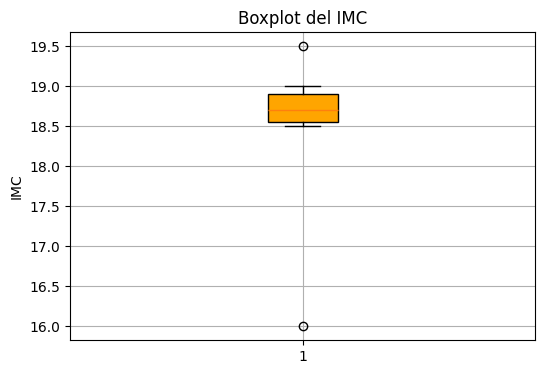

In [4]:
plt.figure(figsize=(6, 4))
plt.boxplot(df["IMC"], vert=True, patch_artist=True, boxprops=dict(facecolor='orange'))
plt.title("Boxplot IMC")
plt.ylabel("IMC")
plt.grid(True)
plt.show()

En cuánto a la distribución que nos presenta el gráfico podemos ver que la mayoría de los valores del índice de masa corporal se encuentran entre 18.5 y 19 y su mediana está cerca de 18.7.

Podemos ver también dos valores atípicos, es decir, fuera de rango, uno en la parte de abajo (16) y otro en la parte superior (19.5).

Por último, el rango intercuartílico no es muy grande, lo que nos puede indicar que los datos en este caso no varían mucho.

## **GRÁFICO 2: TARTA (VACUNA Y TIPO SANGUÍNEO)**

Para contar vectores utilizamos la función 'np.unique' que lo que hace es extraer los valores únicos de una variable categórica (en este caso lo hemos usado para los dos gráficos de las dos únicas variables categóricas: vacuna y tipo sanguíneo) y cuenta su frecuencia. Lo utilizamos para poder ver el tamaño de cada parte del gráfico.

### VACUNA

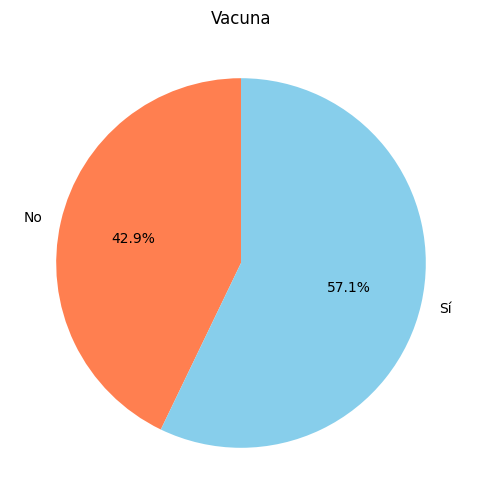

In [14]:
valores1, conteo1 = np.unique(df["Vacuna Hepatitis"], return_counts=True)
plt.figure(figsize=(6, 6))
plt.pie(conteo1, labels=valores1, autopct='%1.1f%%', colors=['coral', 'skyblue'], startangle=90)
plt.title("Vacuna")
plt.show()

### TIPO SANGUÍNEO

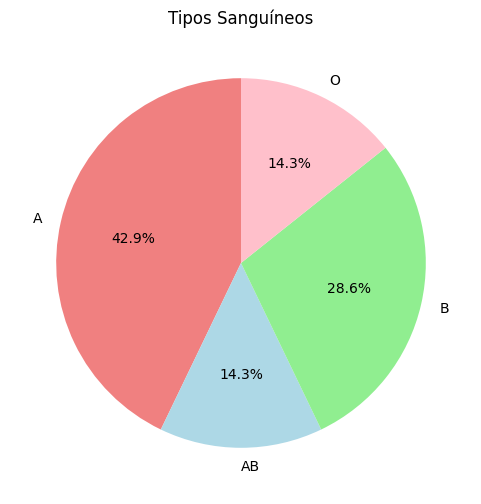

In [16]:
valores2, conteo2 = np.unique(df["Tipo Sanguíneo"], return_counts=True)
plt.figure(figsize=(6, 6))
plt.pie(conteo2, labels=valores2, autopct='%1.1f%%', colors=['lightcoral', 'lightblue', 'lightgreen', 'pink'], startangle=90)
plt.title("Tipos Sanguíneos")
plt.show()

Para el caso de las vacunas podemos ver gracias al gráfico que solo el 57.1% de los estudiantes están vacunados (aproximadamente la mitad), siendo el resto, 42.9% los que están sin vacunar.

Para el caso de los tipos sanguíneos, el más común (que luego lo podremos volver a comprobar con el gráfico de barras) es el tipo 'A' con un 42,9%, mientras que los menos comunes están igualados con 14.3% cada uno en el caso de los tipos 'AB' y '0'. El tipo del medio es el 'B' con una frecuencia de 28.6%.
Es decir, se nota una mayor proporción de estudiantes con tipo sanguíneo A mientras que los grupos 'AB' y '0' son menos frecuentes.

## **GRÁFICO 3: BARRAS**

### VACUNA

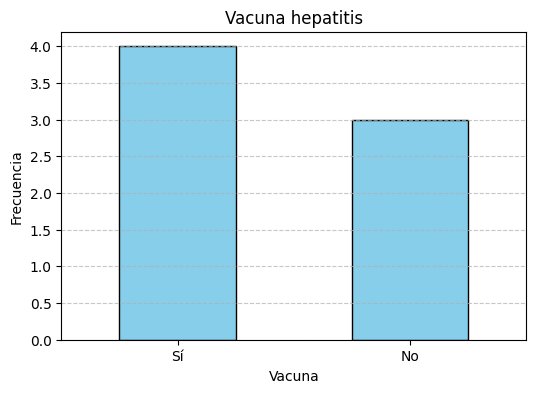

In [11]:
plt.figure(figsize=(6, 4))
df["Vacuna Hepatitis"].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Vacuna hepatitis")
plt.xlabel("Vacuna")
plt.ylabel("Frecuencia")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Notamos gracias a esta gráfica que la mayoría de los estudiantes están vacunados (4) mientras que 3, no lo están. En este gráfico en concreto se ve de manera más clara que la diferencia entre los vacunados y no vacunados no es tan grande como nos indicaba el gráfico de tarta que nos daba los resultados en porcentajes.

### TIPO SANGUÍNEO

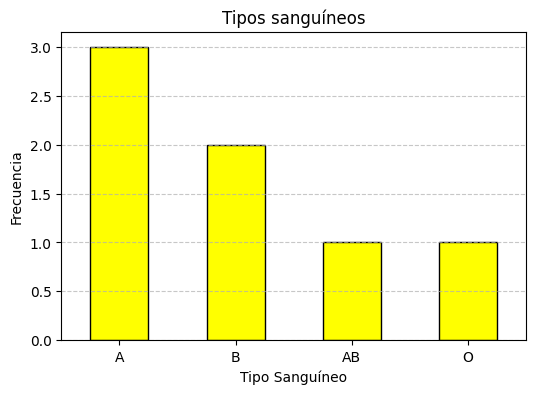

In [10]:
plt.figure(figsize=(6, 4))
df["Tipo Sanguíneo"].value_counts().plot(kind='bar', color='yellow', edgecolor='black')
plt.title("Tipos sanguíneos")
plt.xlabel("Tipo Sanguíneo")
plt.ylabel("Frecuencia")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Este gráfico nos muestra la cantidad de casos dependiendo el grupo sanguíneo, podemos ver que el más común representado por la barra más alta es el tipo 'A' mientras que los menos comunes quedando empate son el tipo 'AB' y el '0' (con 1 cada uno)
Se ve bastante claro una mayor presencia del grupo 'A', mientras que los grupos 'AB' y 'O' son menos comunes.